In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Datasets\placement.csv")

In [3]:
df

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0
...,...,...,...,...
95,95,4.3,200.0,0
96,96,4.4,42.0,0
97,97,6.7,182.0,1
98,98,6.3,103.0,1


In [4]:
df = df.iloc[:,1:]

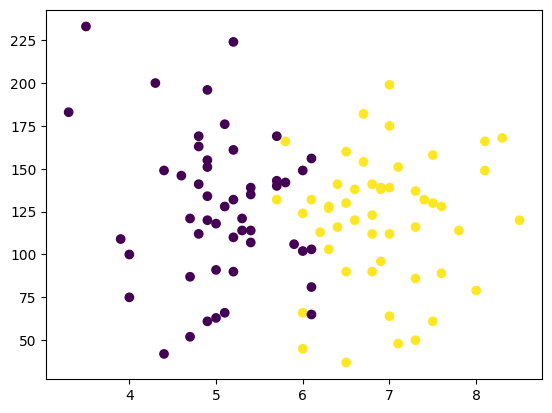

In [5]:
plt.scatter(df['cgpa'], df['iq'], c = df['placement'])

In [6]:
X = df.iloc[:,0:2] # Independent variables (input data)
y = df.iloc[:,-1] # Dependent variable (output data)

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.1) # Here test_size = 0.1 means that 10% of total data from X and Y goes to test data

In [9]:
X_train

,cgpa,iq
36,5.7,140.0
89,4.9,151.0
62,6.0,102.0
48,6.6,138.0
41,5.4,114.0
...,...,...
21,7.1,151.0
98,6.3,103.0
37,8.1,149.0
46,5.3,114.0


In [10]:
y_train

36    0
89    0
62    0
48    1
41    0
     ..
21    1
98    1
37    1
46    0
69    1
Name: placement, Length: 90, dtype: int64

In [11]:
X_test

,cgpa,iq
22,4.9,120.0
61,7.3,137.0
32,7.0,139.0
74,6.7,154.0
18,4.0,100.0
97,6.7,182.0
79,6.5,90.0
92,5.2,110.0
56,6.1,65.0
50,3.5,233.0


In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
scaler = StandardScaler()

In [14]:
X_train = scaler.fit_transform(X_train)

In [15]:
X_train

array([[-0.27908538,  0.44962659],
       [-0.9916438 ,  0.73278837],
       [-0.01187597, -0.52856866],
       [ 0.52254284,  0.39814263],
       [-0.54629479, -0.2196649 ],
       [-0.9916438 ,  0.83575629],
       [ 0.78975225,  0.42388461],
       [ 1.59138047, -0.2196649 ],
       [-1.43699281, -2.07308746],
       [ 0.70068245,  0.01201292],
       [ 1.14603146, -0.16818094],
       [-0.902574  , -0.81173044],
       [-0.8135042 ,  1.37633787],
       [ 0.07719383,  0.24369074],
       [ 1.32417106, -1.58398984],
       [-0.902574  , -0.11669698],
       [-1.88234183, -0.3483748 ],
       [-0.8135042 ,  0.14072282],
       [-1.16978341, -0.03947104],
       [-2.41676064,  1.55653173],
       [-0.72443439,  2.61195291],
       [ 1.76952008, -1.1206342 ],
       [-1.43699281,  0.68130441],
       [ 0.87882205, -0.27114886],
       [ 1.41324087, -0.8632144 ],
       [-1.52606262,  1.99414539],
       [ 0.34440324, -0.16818094],
       [-0.9916438 ,  0.2951747 ],
       [-1.0807136 ,

In [16]:
X_test = scaler.transform(X_test)

In [17]:
X_test

array([[-0.9916438 , -0.06521302],
       [ 1.14603146,  0.37240065],
       [ 0.87882205,  0.42388461],
       [ 0.61161264,  0.81001431],
       [-1.79327202, -0.58005262],
       [ 0.61161264,  1.53078975],
       [ 0.43347304, -0.83747242],
       [-0.72443439, -0.32263282],
       [ 0.07719383, -1.48102192],
       [-2.23862104,  2.84363073]])

In [18]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()

In [19]:
# Model Training
clf.fit(X_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [20]:
y_pred = clf.predict(X_test)

In [21]:
y_pred

array([0, 1, 1, 1, 0, 1, 1, 0, 1, 0], dtype=int64)

In [22]:
y_test

22    0
61    1
32    1
74    1
18    0
97    1
79    1
92    0
56    0
50    0
Name: placement, dtype: int64

In [23]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9

<Axes: >

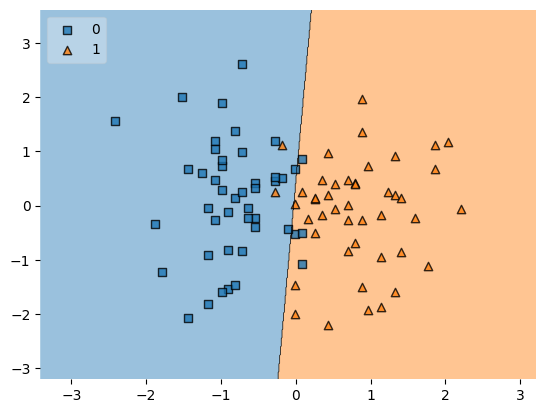

In [24]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X_train,y_train.values, clf=clf, legend=2)

In [27]:
a = scaler.transform([[7.0,147]])
clf.predict(a)

D:\Environments\tf_gpu\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [28]:
import joblib as jb
jb.dump(clf,"model.pkl")

['model.pkl']

In [29]:
jb.dump(scaler,"scaler.pkl")

['scaler.pkl']